In [16]:
import pandas as pd
import numpy as np

In [18]:
# 1. CARGA DE DATOS

columnas_utiles = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate',
    'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'issue_d', 'loan_status',
    'purpose', 'addr_state', 'dti',
    'fico_range_low', 'fico_range_high',
    'revol_bal', 'revol_util', 'total_acc'
]

df = pd.read_csv(
    "lending_club_loans_2007_2011.csv",
    header=1,              # 🔑 CLAVE
    usecols=columnas_utiles,
    low_memory=False
)

print("Dataset cargado correctamente")
print(df.shape)
df.head()

Dataset cargado correctamente
(42538, 21)


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,fico_range_low,fico_range_high,revol_bal,revol_util,total_acc
0,5000.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-2011,Fully Paid,credit_card,AZ,27.65,735.0,739.0,13648.0,83.7%,9.0
1,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-2011,Charged Off,car,GA,1.00,740.0,744.0,1687.0,9.4%,4.0
2,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-2011,Fully Paid,small_business,IL,8.72,735.0,739.0,2956.0,98.5%,10.0
3,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-2011,Fully Paid,other,CA,20.00,690.0,694.0,5598.0,21%,37.0
4,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-2011,Current,other,OR,17.94,695.0,699.0,27783.0,53.9%,38.0


In [6]:
# 2. NORMALIZACIÓN DE COLUMNAS

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

In [ ]:
# 3. LIMPIEZA DE DATOS

# Eliminar columnas con más del 40% de valores nulos
limite_nulos = len(df) * 0.4
df = df.dropna(thresh=limite_nulos, axis=1)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Eliminar columnas irrelevantes
cols_irrelevantes = ['member_id', 'url', 'desc']
df.drop(columns=[c for c in cols_irrelevantes if c in df.columns], inplace=True)

In [8]:
# 4. TRANSFORMACIÓN DE VARIABLES

# Convertir tasas porcentuales
if 'int_rate' in df.columns:
    df['int_rate'] = (
        df['int_rate']
        .astype(str)
        .str.replace('%', '', regex=False)
        .astype(float)
    )

if 'revol_util' in df.columns:
    df['revol_util'] = (
        df['revol_util']
        .astype(str)
        .str.replace('%', '', regex=False)
        .astype(float)
    )

# Crear ratio ingreso / préstamo
if {'annual_inc', 'loan_amnt'}.issubset(df.columns):
    df['income_to_loan_ratio'] = df['annual_inc'] / df['loan_amnt']

# Imputación de nulos en columnas numéricas
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

print("Limpieza y transformación completadas")
print("Dimensión final:", df.shape)


Limpieza y transformación completadas
Dimensión final: (42536, 22)


C:\Users\usuario\AppData\Local\Temp\ipykernel_9728\3758885656.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_9728\3758885656.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
# 5. ANÁLISIS DESCRIPTIVO

print("\nINFORMACIÓN GENERAL")
print(df.info())

print("\nESTADÍSTICAS DESCRIPTIVAS")
print(df.describe().T)

if 'loan_status' in df.columns:
    print("\nDISTRIBUCIÓN DE ESTADO DEL PRÉSTAMO (%)")
    print(df['loan_status'].value_counts(normalize=True) * 100)



INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
Index: 42536 entries, 0 to 42535
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42536 non-null  float64
 1   funded_amnt           42536 non-null  float64
 2   term                  42535 non-null  object 
 3   int_rate              42536 non-null  float64
 4   installment           42536 non-null  float64
 5   grade                 42535 non-null  object 
 6   sub_grade             42535 non-null  object 
 7   emp_length            41423 non-null  object 
 8   home_ownership        42535 non-null  object 
 9   annual_inc            42536 non-null  float64
 10  verification_status   42535 non-null  object 
 11  issue_d               42535 non-null  object 
 12  loan_status           42535 non-null  object 
 13  purpose               42535 non-null  object 
 14  addr_state            42535 non-null  object 
 15  dti

In [11]:
# 6. ANÁLISIS COMPARATIVO (SIN SCIPY)

print("\nTASA MEDIA DE INTERÉS POR ESTADO DEL PRÉSTAMO")
if {'loan_status', 'int_rate'}.issubset(df.columns):
    print(df.groupby('loan_status')['int_rate'].mean().round(2))

print("\nINGRESO MEDIO POR ESTADO DEL PRÉSTAMO")
if {'loan_status', 'annual_inc'}.issubset(df.columns):
    print(df.groupby('loan_status')['annual_inc'].mean().round(2))

print("\nTASA MEDIA DE INTERÉS POR GRADO CREDITICIO")
if {'grade', 'int_rate'}.issubset(df.columns):
    print(df.groupby('grade')['int_rate'].mean().round(2))

print("\nCORRELACIONES CON TASA DE INTERÉS")
variables_corr = ['loan_amnt', 'annual_inc', 'income_to_loan_ratio', 'dti']
for var in variables_corr:
    if var in df.columns:
        corr = df[[var, 'int_rate']].corr().iloc[0, 1]
        print(f"{var}: {corr:.3f}")



TASA MEDIA DE INTERÉS POR ESTADO DEL PRÉSTAMO
loan_status
Charged Off                                            13.83
Current                                                15.29
Default                                                16.40
Does not meet the credit policy. Status:Charged Off    14.60
Does not meet the credit policy. Status:Fully Paid     13.98
Fully Paid                                             11.67
In Grace Period                                        17.94
Late (16-30 days)                                      12.01
Late (31-120 days)                                     16.86
Name: int_rate, dtype: float64

INGRESO MEDIO POR ESTADO DEL PRÉSTAMO
loan_status
Charged Off                                            62482.64
Current                                                75670.88
Default                                                70000.00
Does not meet the credit policy. Status:Charged Off    69525.92
Does not meet the credit policy. Status:Fully Paid    

## Análisis del estado del préstamo

El estado del préstamo (`loan_status`) es la variable clave del estudio, ya que permite
analizar el riesgo crediticio y la rentabilidad potencial de los préstamos.

In [20]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid                                             78.960856
Charged Off                                            13.290232
Does not meet the credit policy. Status:Fully Paid      4.673798
Does not meet the credit policy. Status:Charged Off     1.789115
Current                                                 1.206066
In Grace Period                                         0.037616
Late (31-120 days)                                      0.028212
Late (16-30 days)                                       0.011755
Default                                                 0.002351
Name: proportion, dtype: float64

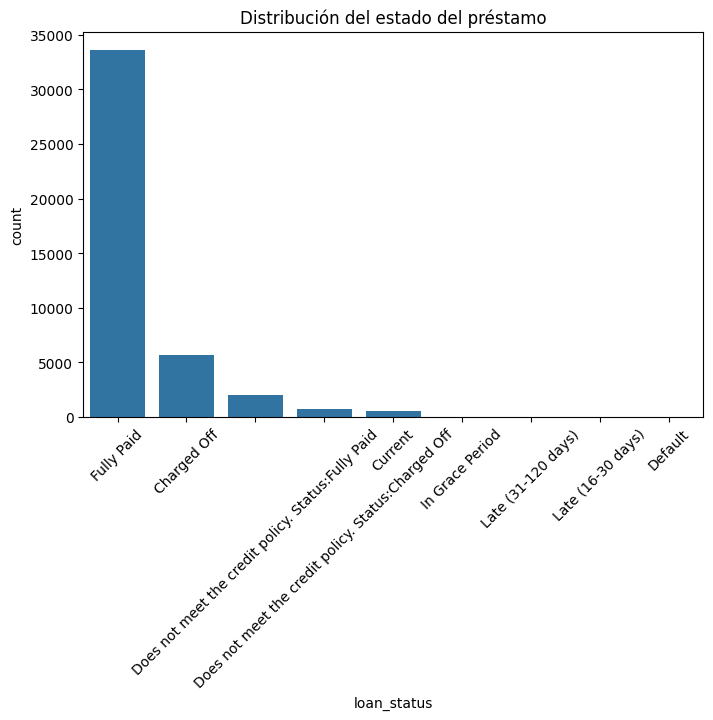

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Distribución del estado del préstamo')
plt.xticks(rotation=45)
plt.show()


## Relación entre riesgo y tipo de interés

Se analiza cómo varía el tipo de interés según el estado del préstamo,
ya que un mayor riesgo suele asociarse a mayores tasas de interés.

In [29]:
df['int_rate'].dtype

dtype('float64')

In [30]:
df['loan_status'] = df['loan_status'].astype('category')

In [31]:
df.groupby('loan_status')['int_rate'].mean().sort_values(ascending=False)

C:\Users\usuario\AppData\Local\Temp\ipykernel_9728\2061322122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('loan_status')['int_rate'].mean().sort_values(ascending=False)


loan_status
In Grace Period                                        17.942500
Late (31-120 days)                                     16.865000
Default                                                16.400000
Current                                                15.289454
Does not meet the credit policy. Status:Charged Off    14.597148
Does not meet the credit policy. Status:Fully Paid     13.978642
Charged Off                                            13.828567
Late (16-30 days)                                      12.008000
Fully Paid                                             11.670300
Name: int_rate, dtype: float64

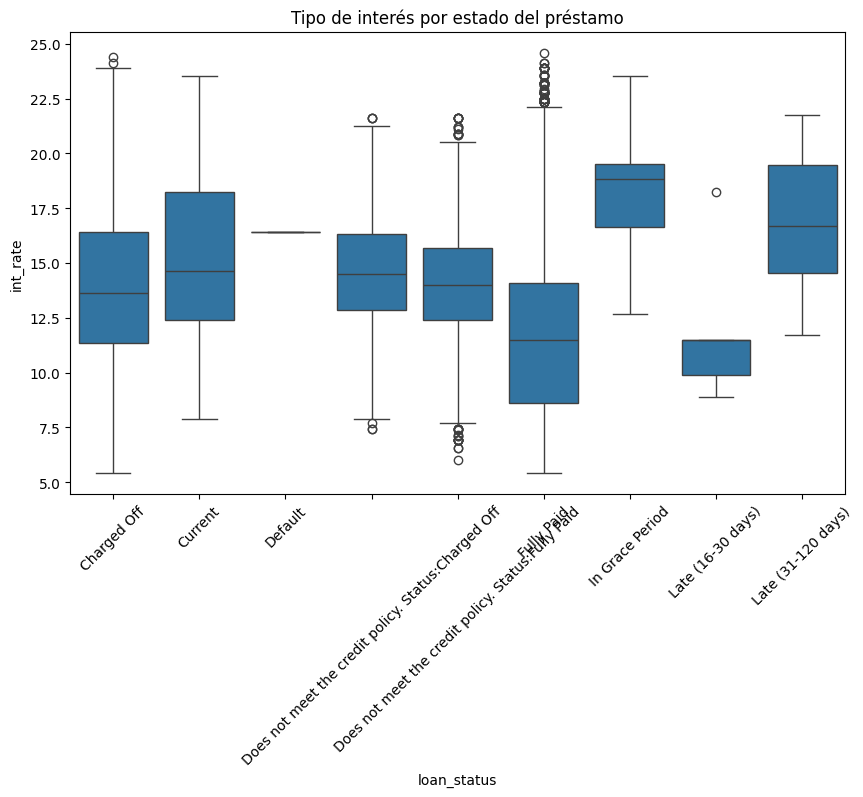

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Tipo de interés por estado del préstamo')
plt.xticks(rotation=45)
plt.show()


## Análisis del grado del préstamo

El grado del préstamo (`grade`) es un indicador del riesgo asignado por la entidad.
Se analiza su relación con el estado final del préstamo.

In [33]:
grade_status = pd.crosstab(df['grade'], df['loan_status'], normalize='index') * 100
grade_status

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,,,,
A,5.911814,0.196406,0.000000,0.078562,0.883826,92.919572,0.000000,0.009820,0.000000
B,11.542497,1.202680,0.000000,0.686093,2.171281,84.332876,0.016143,0.024215,0.024215
C,15.480549,1.395881,0.000000,1.693364,5.503432,75.881007,0.022883,0.000000,0.022883
D,18.716755,1.778590,0.000000,3.274601,8.211436,67.935505,0.033245,0.016622,0.033245
E,21.213907,2.180318,0.029464,4.655274,11.137301,60.459635,0.235710,0.000000,0.088391
F,24.673328,2.690238,0.000000,7.148347,11.837048,53.420446,0.076864,0.000000,0.153728
G,19.726562,1.171875,0.000000,14.062500,23.828125,41.015625,0.195312,0.000000,0.000000


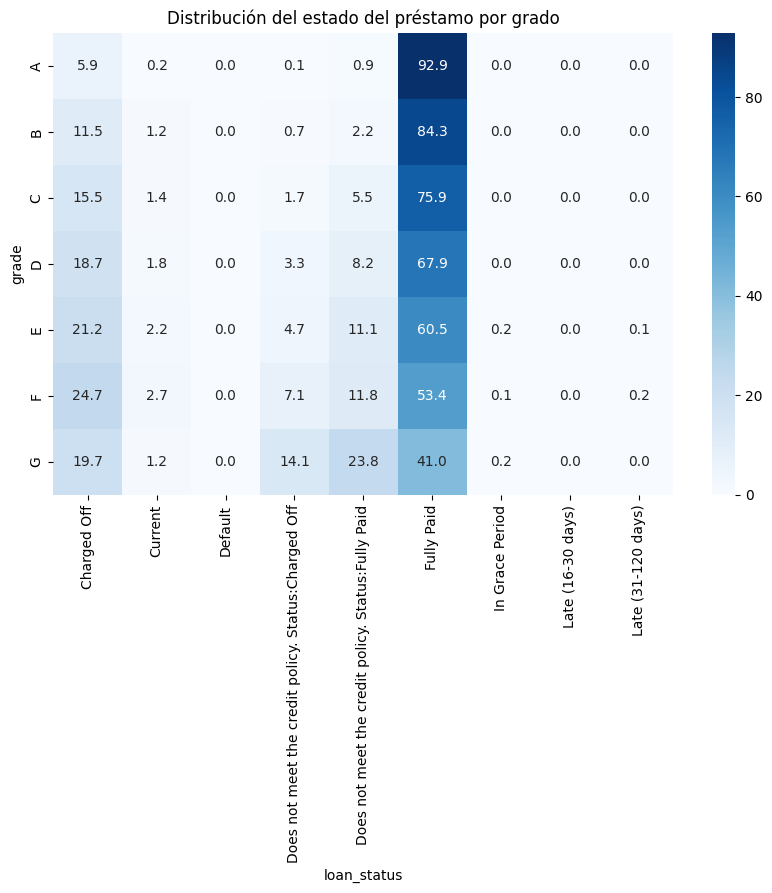

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(grade_status, annot=True, fmt='.1f', cmap='Blues')
plt.title('Distribución del estado del préstamo por grado')
plt.show()
